<h1><center><font size="6">Credit Card Fraud Detection</font></center></h1>


<center><img src="asl.jpg" width="600"></img></center>


# <h2 id='0'>Problem Statement</h2>
Regardless of the widespread usage of spoken languages, the value of American Sign Language (ASL) in fostering diversity, eliminating communication obstacles, and fostering an inclusive society cannot be underestimated.          
In the United States alone, there are between 500,000 and two million people who use American Sign Language (ASL).    
It ranks sixth in terms of usage in the US, after Spanish, Italian, German, and French.                   
In this project, a pytorch model is made to capture a picture of an ASL alphabet letter and identify it. 
Learning ASL is crucial, **which is why I've got you covered no matter how you want to study, whether you like reading or listening.**                      
**I utilised Watson TextToSpeechV1 to help you learn however you like.**

<h3> Data obtained from:<a> https://www.kaggle.com/datasets/ayuraj/asl-dataset?datasetId=177084&sortBy=voteCount </a></h3>

## Libraries

In [33]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Importing IBM Watson TextToSpeechV1
from ibm_watson import TextToSpeechV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

## Data


In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [3]:
# Create an instance of the ImageFolder dataset
dataset = ImageFolder('asl_dataset', transform=transform)

# Create a dataloader for the dataset
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

## Model

In [4]:
# Load the pre-trained ResNet18 model
model = resnet18(pretrained=True)
num_features = model.fc.in_features

# Modify the last fully connected layer to have the desired number of classes
model.fc = nn.Linear(num_features, len(dataset.classes))


/Users/sherywalid/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/sherywalid/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/sherywalid/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████| 44.7M/44.7M [00:12<00:00, 3.72MB/s]


In [5]:
# Set the model to training mode
model.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10

In [7]:
for epoch in range(num_epochs):
    running_loss = 0.0
    
    for images, labels in dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    # Print the average loss for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}")


Epoch 1/10, Loss: 0.4210600423904365
Epoch 2/10, Loss: 0.057935241985608614
Epoch 3/10, Loss: 0.02594029010894398
Epoch 4/10, Loss: 0.004076742970490861
Epoch 5/10, Loss: 0.05950732493523933
Epoch 6/10, Loss: 0.08626961598597598
Epoch 7/10, Loss: 0.035195028944463844
Epoch 8/10, Loss: 0.028422662701351534
Epoch 9/10, Loss: 0.004544358544272224
Epoch 10/10, Loss: 0.0008710420725197254


## Evaluation

In [22]:
# Define the list of image paths
words = [
    ['asl_dataset/h/hand1_h_bot_seg_1_cropped.jpeg', 'asl_dataset/e/hand1_e_bot_seg_1_cropped.jpeg',
     'asl_dataset/l/hand1_l_bot_seg_1_cropped.jpeg', 'asl_dataset/l/hand1_l_bot_seg_2_cropped.jpeg',
     'asl_dataset/o/hand1_o_bot_seg_1_cropped.jpeg'],
    
    ['asl_dataset/h/hand1_h_bot_seg_1_cropped.jpeg', 'asl_dataset/o/hand1_o_bot_seg_1_cropped.jpeg',
     'asl_dataset/w/hand1_w_bot_seg_1_cropped.jpeg'],
    
    ['asl_dataset/a/hand1_a_bot_seg_1_cropped.jpeg', 'asl_dataset/r/hand1_r_bot_seg_1_cropped.jpeg',
     'asl_dataset/e/hand1_e_bot_seg_1_cropped.jpeg'],
    
    ['asl_dataset/y/hand1_y_bot_seg_5_cropped.jpeg', 'asl_dataset/o/hand1_o_bot_seg_4_cropped.jpeg',
     'asl_dataset/u/hand1_u_bot_seg_3_cropped.jpeg'],
    
    ['asl_dataset/t/hand1_t_bot_seg_4_cropped.jpeg', 'asl_dataset/o/hand1_o_bot_seg_4_cropped.jpeg', 
     'asl_dataset/d/hand1_d_bot_seg_5_cropped.jpeg', 'asl_dataset/a/hand1_a_bot_seg_1_cropped.jpeg',
     'asl_dataset/y/hand1_y_bot_seg_2_cropped.jpeg']
]

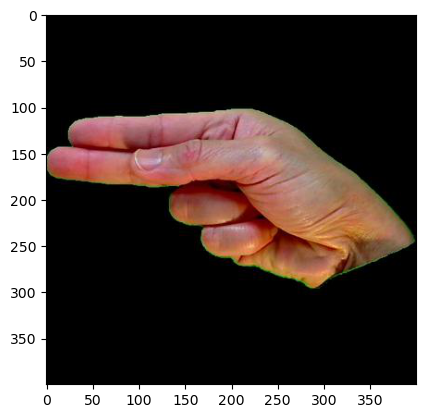

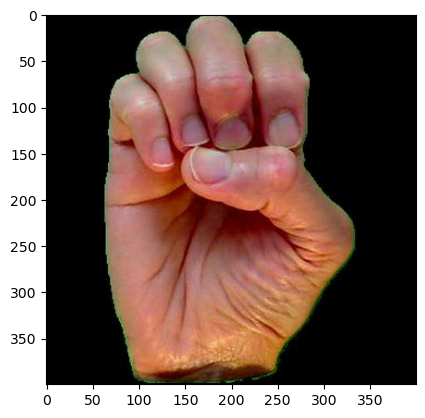

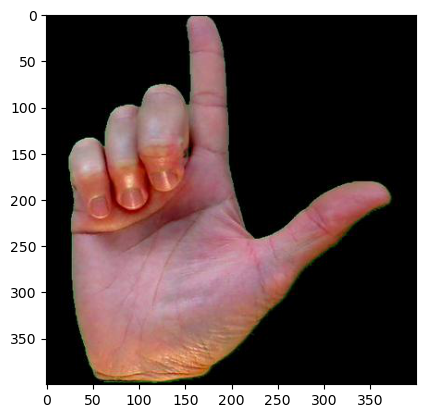

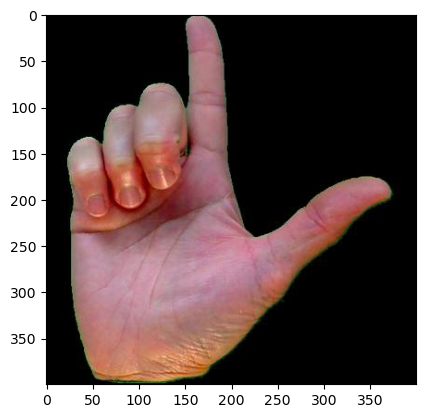

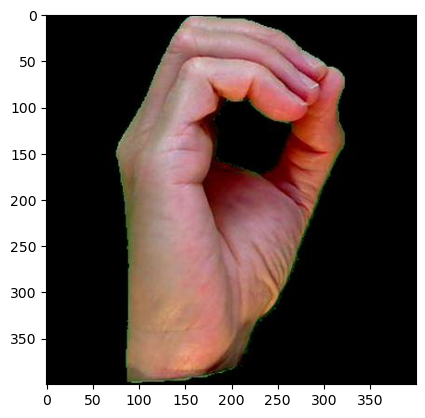

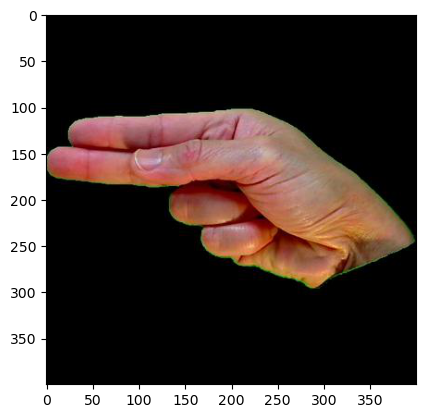

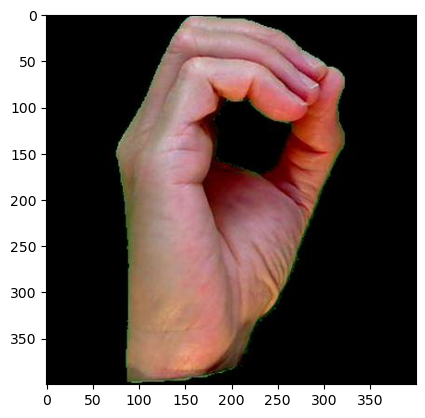

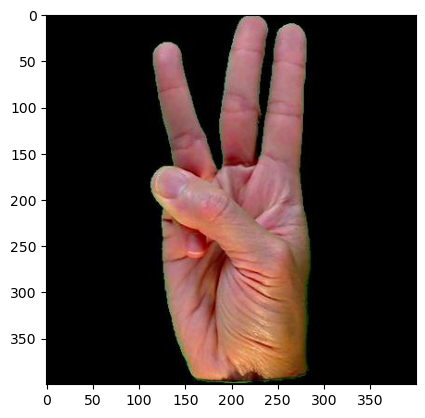

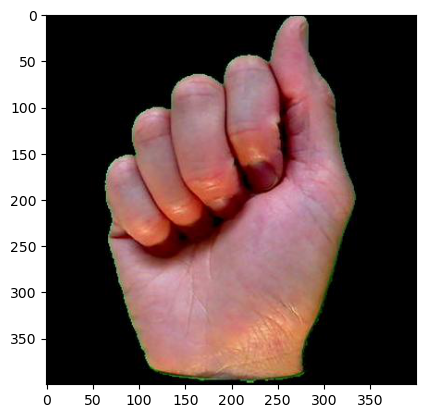

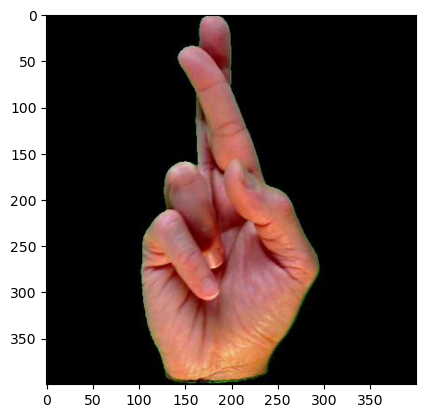

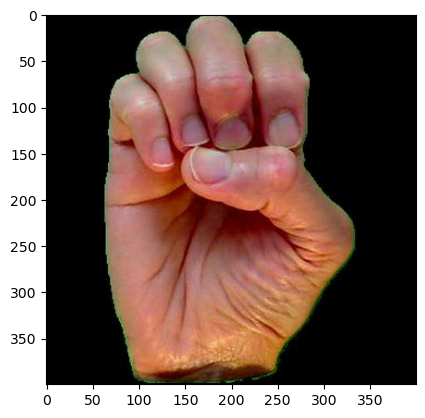

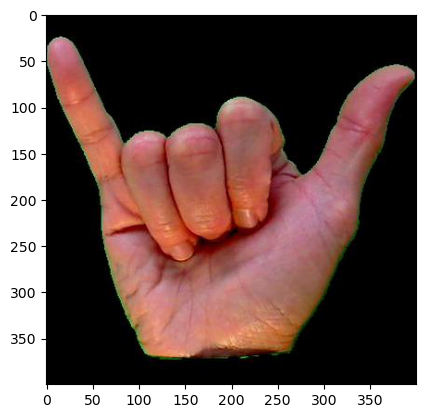

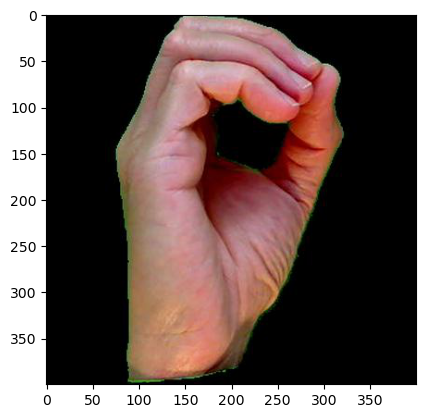

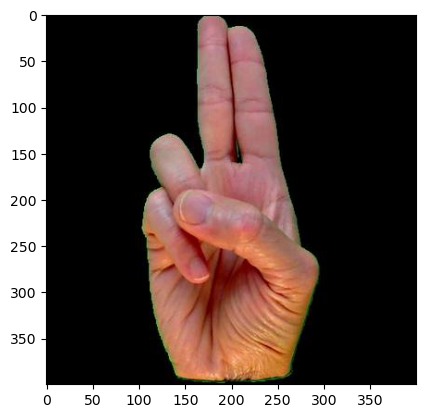

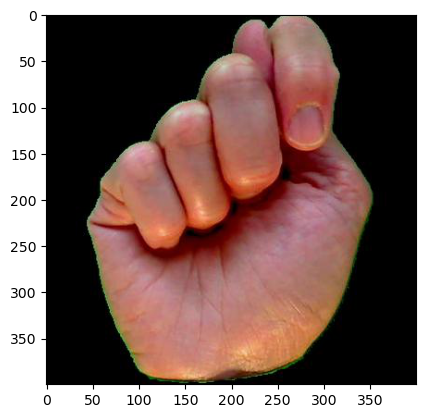

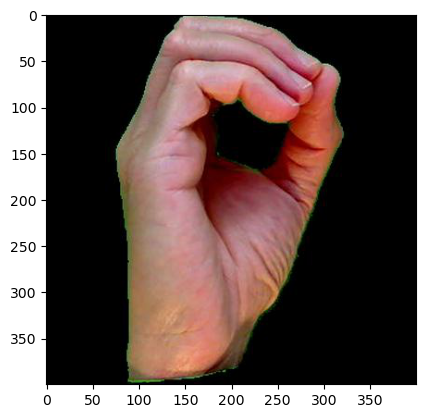

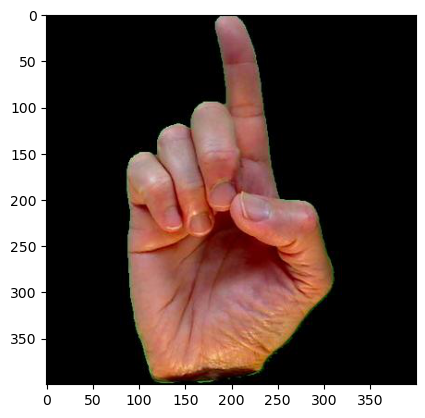

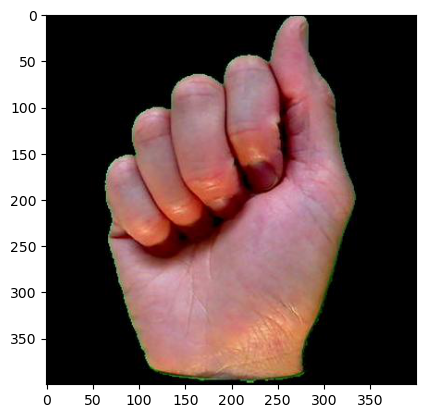

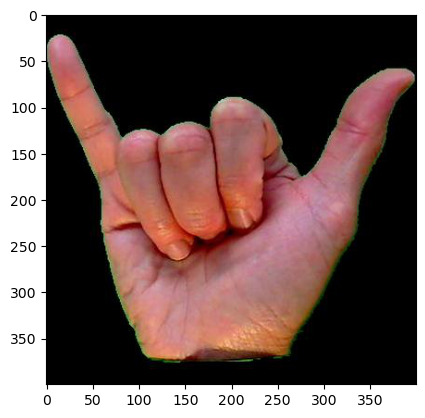

In [21]:
# Display the images
for sublist in words:
    for image_path in sublist:
        img = mpimg.imread(image_path)
        imgplot = plt.imshow(img)
        plt.show()

In [16]:

# Initialize an empty list to store the results
results = []

# Loop over the words
for word in words:
    # Initialize an empty list to store the predicted letters for each word
    predicted_letters = []
    
    # Loop over the image paths in the word
    for image_path in word:
        # Preprocess the input image
        image = Image.open(image_path)
        input_image = transform(image).unsqueeze(0)

        # Pass the input image through the model
        with torch.no_grad():
            output = model(input_image)

        # Get the predicted class
        _, predicted_class = torch.max(output, 1)

        # Map the predicted class index to the corresponding letter
        predicted_letter = dataset.classes[predicted_class.item()]
        
        # Append the predicted letter to the list
        predicted_letters.append(predicted_letter)
    
    # Append the predicted letters to the results list
    results.append(predicted_letters)


In [36]:
sentence = []
for word in results:
    sentence.append(''.join(word))

In [37]:
sentence = ' '.join(sentence)

In [38]:
print('ASL tells: ', sentence)

ASL tells:  hello how are you today


In [28]:
# Setup Service
authenticator = IAMAuthenticator("API")
tts = TextToSpeechV1(authenticator=authenticator)
tts.set_service_url("URL")

In [30]:
with open('./speech.mp3', 'wb') as audio_file:
    res = tts.synthesize(sentence, accept='audio/mp3', voice='en-US_AllisonV3Voice').get_result()
    audio_file.write(res.content)

In [31]:
torch.save(model.state_dict(), 'model.pth')